<a href="https://colab.research.google.com/github/Rchintalapati0111/Sentiment_Analysis/blob/main/Googleplaystoreproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


In [162]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re

In [75]:
%%capture
!apt update
!pip install kaggle

In [76]:
from google.colab import files

# Upload the kaggle.json file from your local machine to Colab
uploaded = files.upload()

Saving kaggle.json to kaggle (4).json


In [77]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d lava18/google-play-store-apps
!unzip google-play-store-apps.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
google-play-store-apps.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  google-play-store-apps.zip
replace googleplaystore.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace googleplaystore_user_reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace license.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [78]:
df = pd.read_csv('googleplaystore.csv')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning:

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [80]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [81]:
print(df.isnull().sum())

print(len(df))

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
10841


####Observation: We can see that there are 1474 (i.e 13.6%) null values in Rating column. We shall drop null values from other columns and use KNN imputer to fill the missing values in Rating column.

In [82]:
# Using KNN imputer:

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

features = df[['Rating']]

# Impute the missing values:

df_imputed = imputer.fit_transform(features)

# Filling the column with imputed values:

df['Rating'] = df_imputed[:, 0]


In [83]:
# Dropping other null values:

df.dropna(subset = ['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace = True)

print(df.isna().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [84]:
# Conversion of the data types of selected numeric columns:

df['Reviews'] = df['Reviews'].astype(int)

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

df['Price'] = df['Price'].str.replace('$', '').astype(float)


<ipython-input-84-2af4cd0180a1>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

<ipython-input-84-2af4cd0180a1>:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [85]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1e6
    elif 'k' in size:
        return float(size.replace('k', '')) * 1e3
    elif 'Varies with device' == size:
        return None
    else:
        return float(size)

# Apply this function to the 'Size' column:

df['Size'] = df['Size'].map(convert_size)

In [86]:
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838     9500000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 10829, dtype: float64

In [87]:
df['Size'].isna().sum()

mean_value = df['Size'].mean()

# Filling the missing values in size column with mean:

df['Size'].fillna(value=mean_value, inplace=True)

print(df['Size'].isna().sum())


0


In [88]:
# Using explode function on Genre column:

df['Genres'] = df['Genres'].str.split(';')

# Explode the 'Genres' list into separate rows:

df_exploded = df.explode('Genres')

df_exploded

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,1.900000e+07,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,1.400000e+07,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,1.400000e+07,500000,Free,0.0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.700000e+06,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,2.500000e+07,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,5.300000e+07,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000e+06,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.500000e+06,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,2.153496e+07,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [89]:
df = df_exploded.copy()

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [90]:
# Converting Last updated into datetime:

df['Last Updated'] = pd.to_datetime(df['Last Updated'])


In [91]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up


In [92]:
# Removing underscores from Category column:

df['Category'] = df['Category'].str.replace('_',' ')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up


In [93]:
# Dropping the duplicates from df:

df = df.drop_duplicates()


In [94]:
# Checking for outliers:

def find_outliers(df):

    outliers = {}

    for column in df.columns:

        if df[column].dtype in ['int64', 'float64']:

            Q1 = df[column].quantile(0.25)

            Q3 = df[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 4 * IQR

            upper_bound = Q3 + 4 * IQR

            # Finding outliers:

            mask = (df[column] < lower_bound) | (df[column] > upper_bound)

            outliers[column] = df[column][mask]

    return outliers

# Find outliers in the DataFrame:

outliers = find_outliers(df)

# Display outliers for each column:

for column, values in outliers.items():

    print(f"Outliers in {column}: {len(values)}")

print(len(df))


Outliers in Rating: 128
Outliers in Reviews: 1439
Outliers in Size: 0
Outliers in Installs: 780
Outliers in Price: 830
10764


In [95]:
# Let us now handle the outliers by capping them:

for column in df.columns:

    if df[column].dtype == 'float64':

        upper_limit = df[column].quantile(0.95)

        lower_limit = df[column].quantile(0.05)

        df.loc[df[column] > upper_limit, column] = upper_limit

        df.loc[df[column] < lower_limit, column] = lower_limit

In [96]:
def find_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:

            Q1 = df[column].quantile(0.25)

            Q3 = df[column].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 4 * IQR

            upper_bound = Q3 + 4 * IQR

            # Finding outliers:

            mask = (df[column] < lower_bound) | (df[column] > upper_bound)

            outliers[column] = df[column][mask]

    return outliers

# Find outliers in the DataFrame:

outliers = find_outliers(df)

# Display outliers for each column:

for column, values in outliers.items():

    print(f"Outliers in {column}: {len(values)}")




Outliers in Rating: 0
Outliers in Reviews: 1439
Outliers in Size: 0
Outliers in Installs: 780
Outliers in Price: 830


####Observation: We shall keep the outliers of Reviews column as it has nearly 13% outliers. Outliers in Installs and Price are less than 10%. Thus, we will exclude them from df.

In [97]:
# Dropping the outliers from Installs and Price columns:

Q3_installs = df['Installs'].quantile(0.75)

IQR_installs = df['Installs'].quantile(0.75) - df['Installs'].quantile(0.25)

upper_bound_installs = Q3_installs + 4 * IQR_installs

Q3_price = df['Price'].quantile(0.75)

IQR_price = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)

upper_bound_price = Q3_price + 4 * IQR_price

Q1_installs = df['Installs'].quantile(0.25)

lower_bound_installs = Q1_installs - 4 * IQR_installs

Q1_price = df['Price'].quantile(0.25)

lower_bound_price = Q1_price - 4 * IQR_price

df_filtered = df[(df['Installs'] >= lower_bound_installs) &
                 (df['Installs'] <= upper_bound_installs) &
                 (df['Price'] >= lower_bound_price) &
                 (df['Price'] <= upper_bound_price)]

df = df_filtered.copy()


In [98]:
# Removing any leading or trailing whitespaces:

df['App'] = df['App'].str.strip()

df['Category'] = df['Category'].str.strip()



In [99]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


##Exploratory Data Analysis:

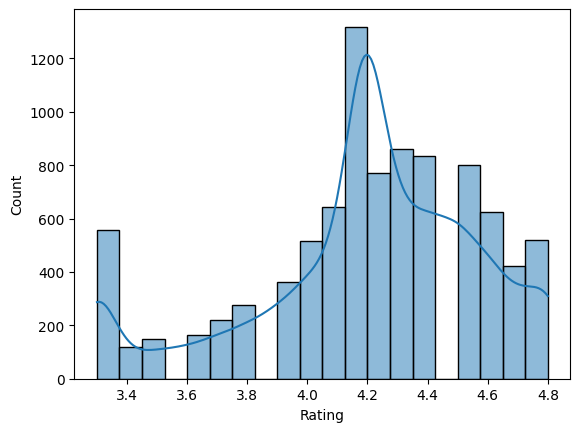

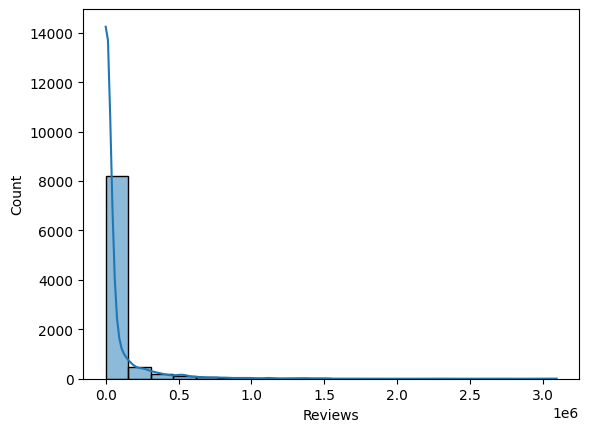

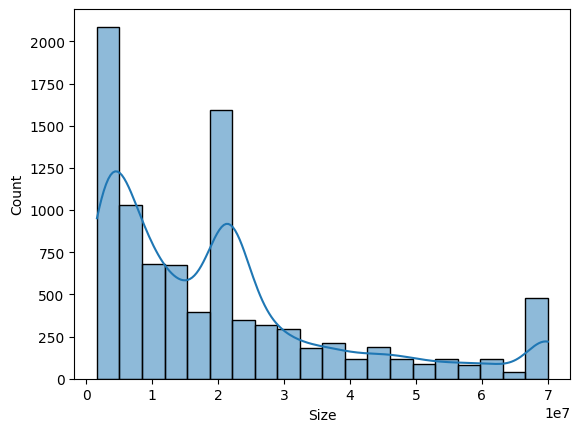

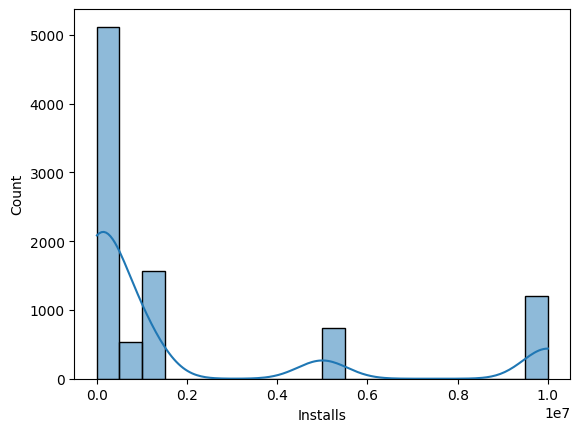

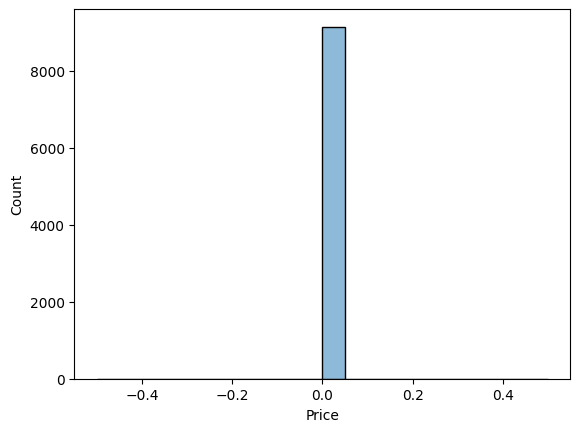

In [100]:
for column in df.columns:

  if df[column].dtype in ['int64','float64']:

    sns.histplot(df[column], bins=20, kde=True)

    plt.show()

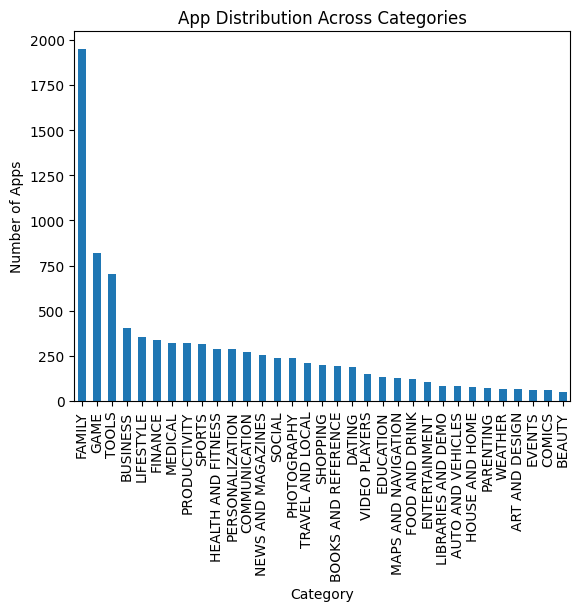

In [101]:
# App distribution across categories plot:

df['Category'].value_counts().plot(kind='bar')
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

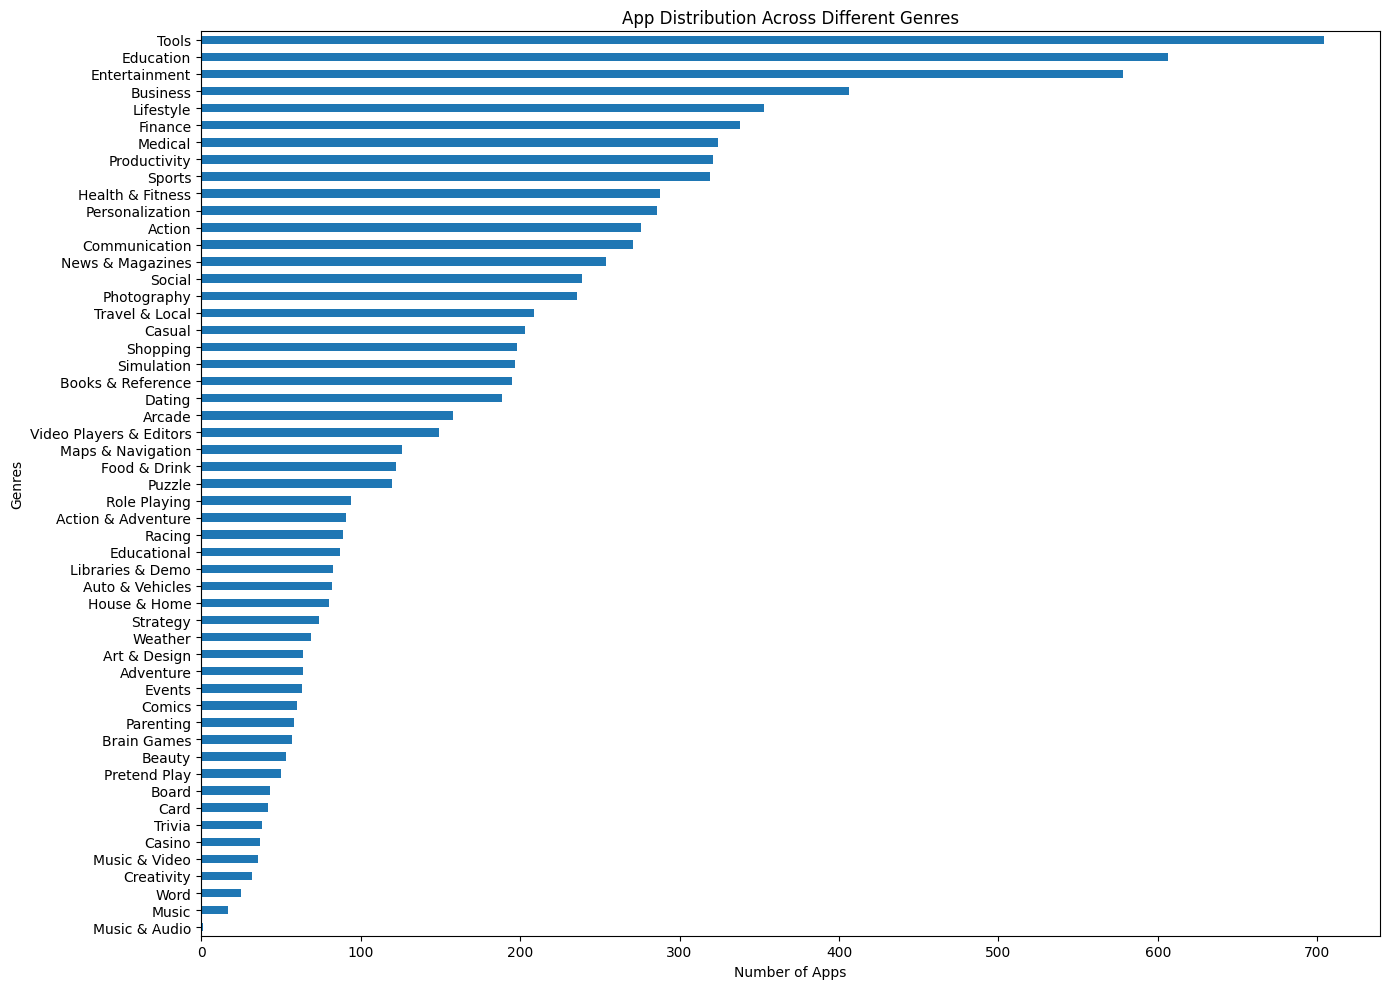

In [102]:
# App Distribution Across Different Genres:

plt.figure(figsize=(14, 10))
sorted_values = df['Genres'].value_counts().sort_values(ascending = True)

sorted_values.plot(kind='barh')
plt.title('App Distribution Across Different Genres')
plt.xlabel('Number of Apps')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()


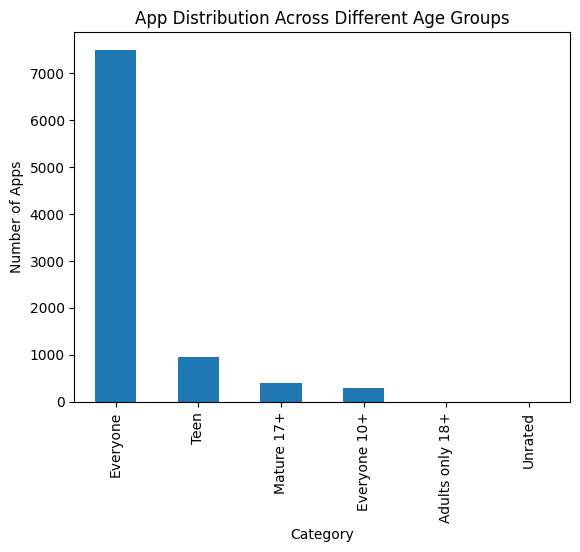

In [103]:
# App distribution across different age groups plot:

df['Content Rating'].value_counts().plot(kind='bar')
plt.title('App Distribution Across Different Age Groups')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

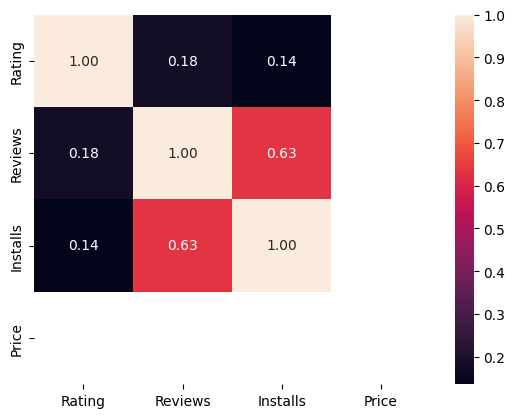

In [104]:
# Correlation matrix:

sns.heatmap(df[['Rating', 'Reviews', 'Installs', 'Price']].corr(), annot=True, fmt=".2f")

plt.show()


####Observation:
1. 'Rating' has a low correlation with 'Reviews' (0.18) and 'Installs' (0.14), suggesting that higher ratings do not necessarily correlate strongly with the number of reviews or installs.
2. 'Reviews' and 'Installs' have a moderate positive correlation (0.63), indicating that apps with more reviews tend to have more installs.
3. 'Price' does not seem to have a strong correlation with 'Rating', 'Reviews', or 'Installs', suggesting that an app's price is not significantly related to its popularity or users' ratings.

In [105]:
# We shall drop the column Price as it doesnt have any correlation:

print(df[['Price']].value_counts())

print(len(df))

# OBSERVATION: We can see that the frequency of 0 is 9154. So, we can remove the price column as there is no variance in the column.

df.drop('Price', axis=1, inplace=True)

Price
0.0      9154
dtype: int64
9154


In [106]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19000000.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8700000.0,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2800000.0,100000,Free,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


### Trend Analysis:

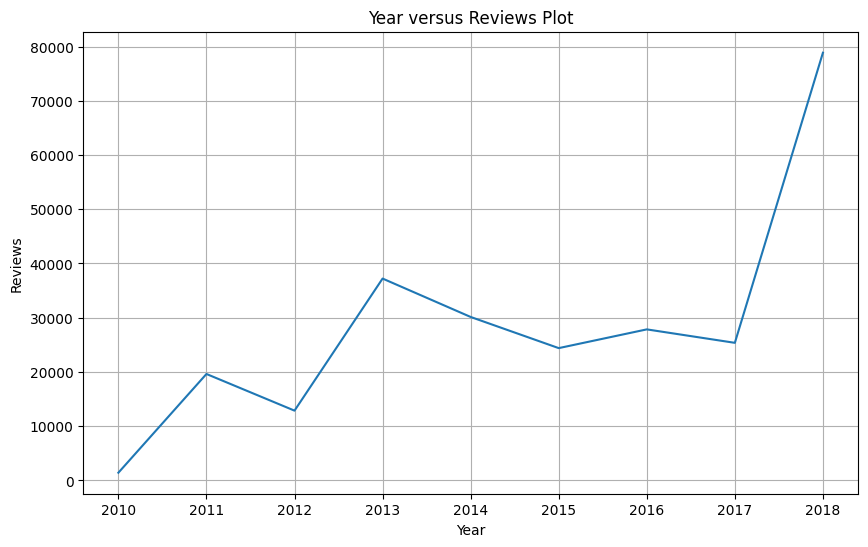

In [107]:
# Reviews versus Time Plot:

df['Year'] = df['Last Updated'].dt.year
plt.figure(figsize=(10,6))
df.groupby('Year')['Reviews'].mean().plot(kind='line')
plt.title('Year versus Reviews Plot')
plt.xlabel('Year')
plt.ylabel('Reviews')
plt.grid(True)
plt.show()


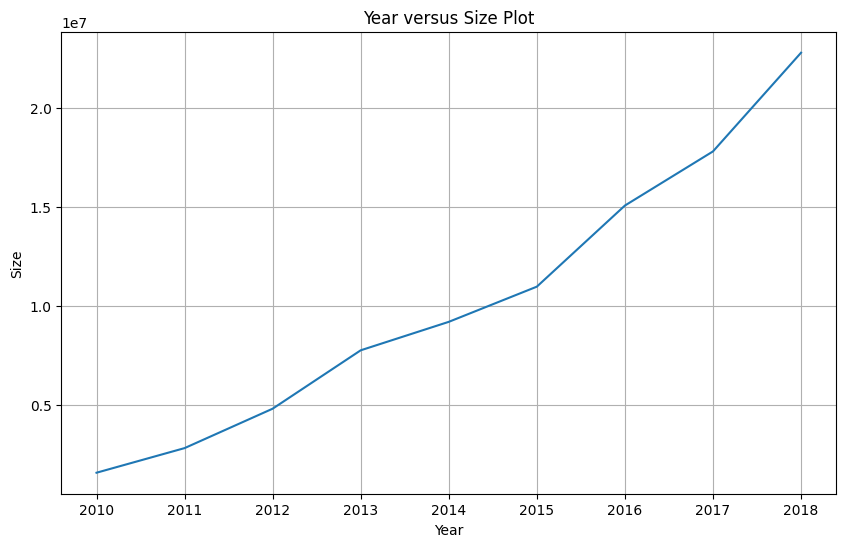

In [108]:
# Size versus Time Plot:


plt.figure(figsize=(10,6))
df.groupby('Year')['Size'].mean().plot(kind='line')
plt.title('Year versus Size Plot')
plt.xlabel('Year')
plt.ylabel('Size')
plt.grid(True)
plt.show()

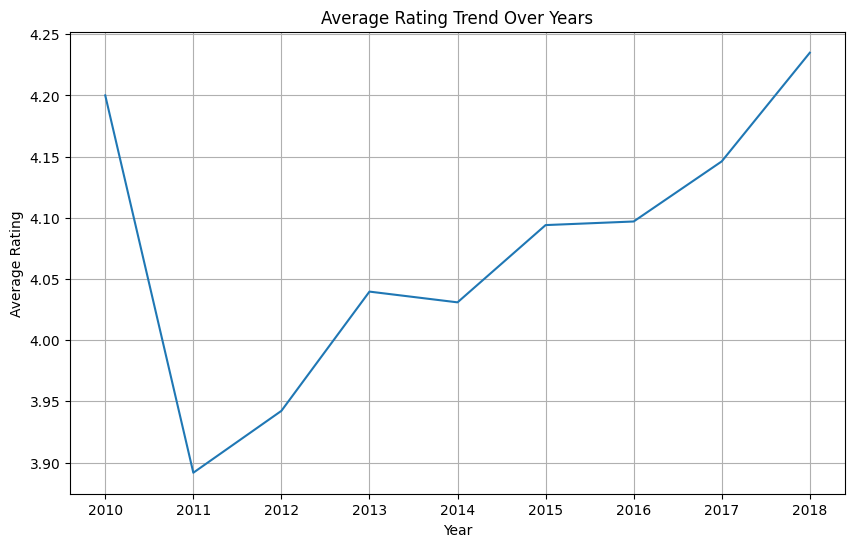

In [109]:
# Group by year and get mean rating:

trends = df.groupby('Year')['Rating'].mean()

# Plot:

plt.figure(figsize=(10,6))
trends.plot(kind='line')
plt.title('Average Rating Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


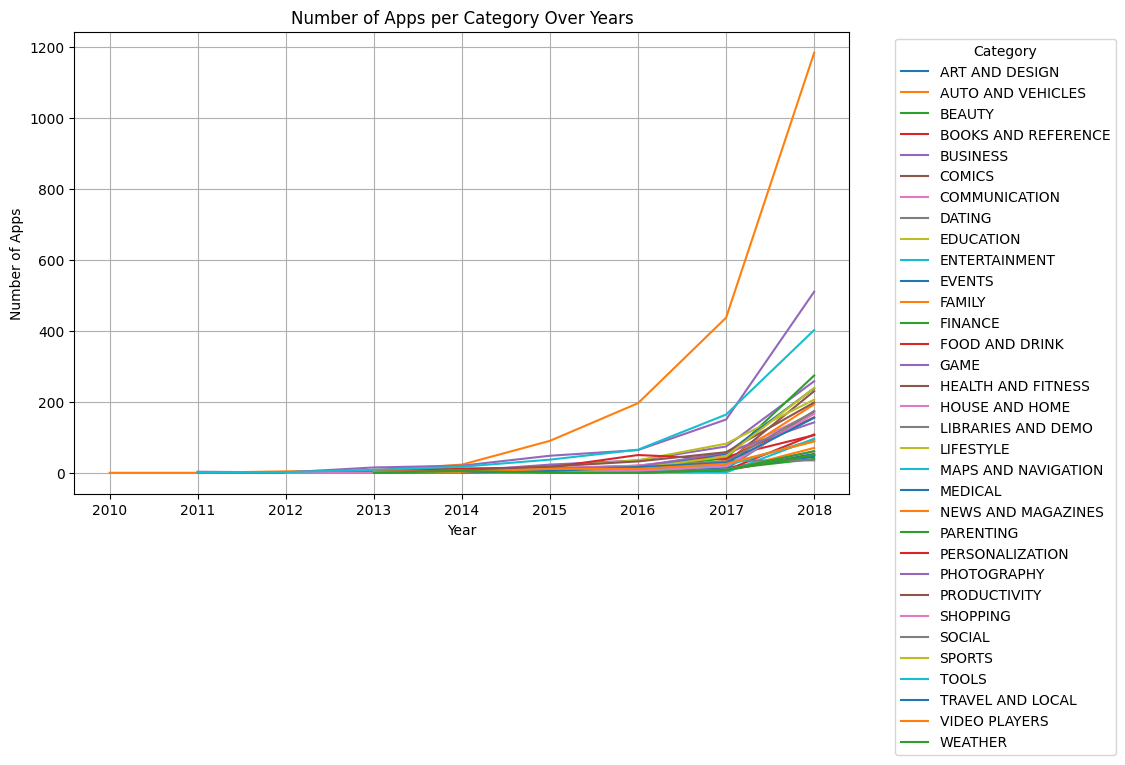

In [110]:
category_trends_count = df.groupby(['Year', 'Category']).size().unstack()

# Plot:

category_trends_count.plot(kind='line', figsize=(10, 6))

plt.title('Number of Apps per Category Over Years')

plt.xlabel('Year')

plt.ylabel('Number of Apps')

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

plt.show()

#category_trends_count

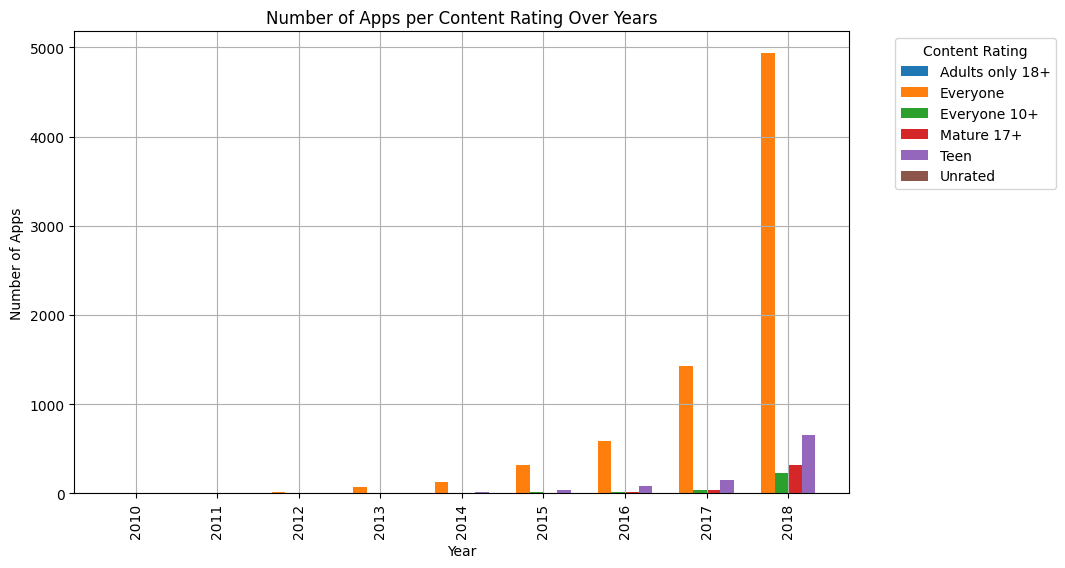

In [111]:
content_rating_trends_count = df.groupby(['Year', 'Content Rating']).size().unstack()

# Plot:

content_rating_trends_count.plot(kind='bar', figsize=(10, 6), width= 1)
plt.title('Number of Apps per Content Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.legend(title='Content Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

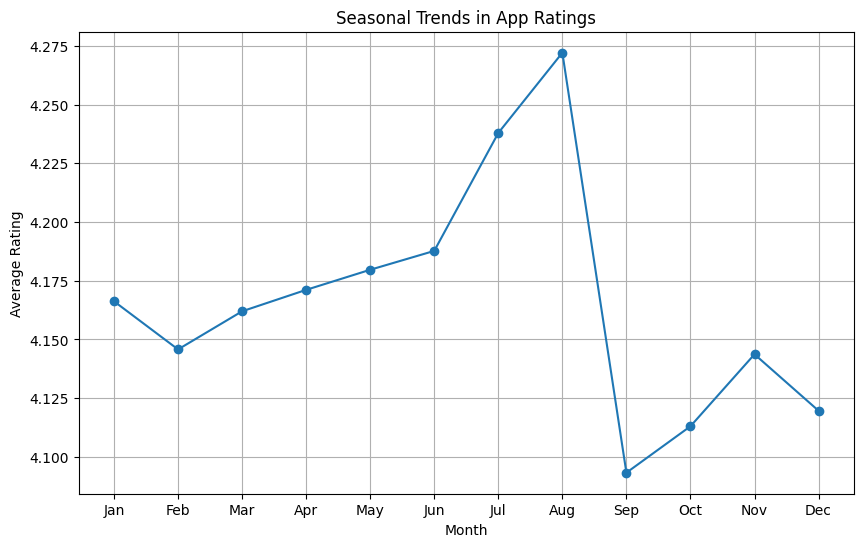

In [112]:
df['Month'] = df['Last Updated'].dt.month

# Group by month and calculate average rating:

seasonal_trends = df.groupby('Month')['Rating'].mean()

# Plot:

plt.figure(figsize=(10, 6))

seasonal_trends.plot(kind='line', marker='o')

plt.title('Seasonal Trends in App Ratings')

plt.xlabel('Month')

plt.ylabel('Average Rating')

plt.grid(True)

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

In [113]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19000000.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8700000.0,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2800000.0,100000,Free,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,2018,6


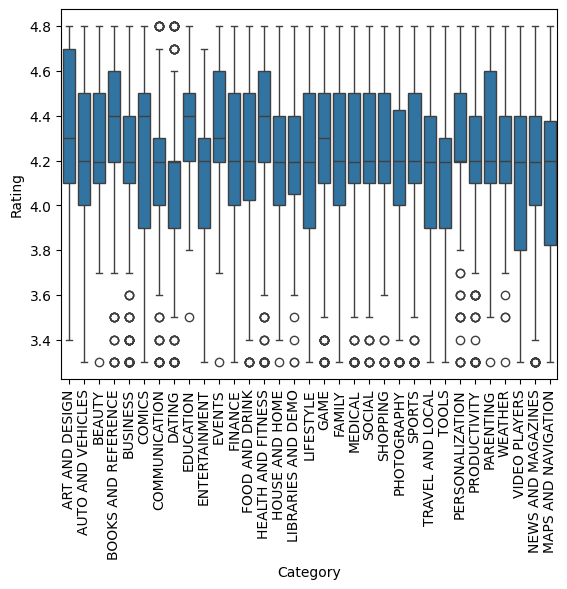

In [114]:
# Rating analysis:

sns.boxplot(x='Category', y='Rating', data=df)

plt.xticks(rotation=90)

plt.show()

# As we have retained outliers in Rating column, we can observe them in the plot.

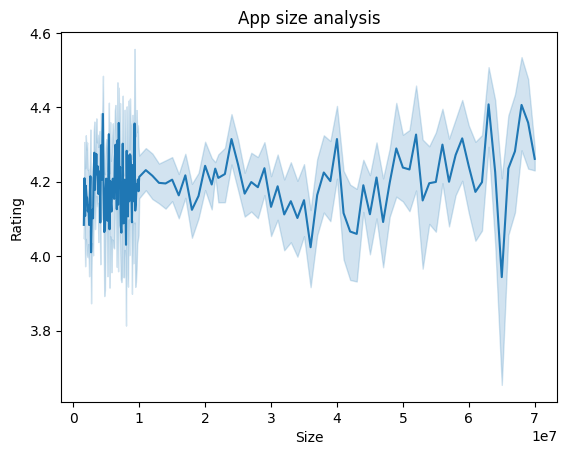

In [115]:
# Analysis of App Size:

sns.lineplot(x='Size', y='Rating', data=df)
plt.title('App size analysis')
plt.show()

In [116]:
# Animated plot of Apps over the years:

fig = px.scatter(
    df,
    x='Reviews',
    y='Rating',
    animation_frame='Year',
    size='Installs',  # (Size of the bubbles)
    color='Category',
    hover_name='App',
    log_x=True,
    size_max=60
)

fig.update_layout(title='Animated Scatter Plot of Apps')
fig.show()


##Feature Engineering:

#### Rating Prediction:
We will build a regression model to predict the 'Rating' of an app based on features like 'Reviews', 'Size', 'Installs', 'Price', and more. Let us now find the correlation of the features with the outcome y.

In [117]:
# Mutual Information regression:

X = df[['Reviews', 'Size', 'Installs']]

y = df['Rating']

# Calculate mutual information:

mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Display mutual information scores:

print(mi_scores)


Reviews     0.471012
Installs    0.321613
Size        0.062707
Name: MI Scores, dtype: float64


####Creating Low, Medium, and High ranges for the Install column:

In [118]:
bins = [0, 10000, 1000000, float('inf')]

labels = ['Low', 'Medium', 'High']

df['Install_Range'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [119]:
df['Install_Range']

0           Low
1        Medium
1        Medium
2          High
4        Medium
          ...  
10836       Low
10837       Low
10838       Low
10839       Low
10840      High
Name: Install_Range, Length: 9154, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

####Observation:
We could use Reviews and Installs as key inputs to predict outcomes like user ratings or to classify apps into various categories of success.

## Ratings Prediction:

In [120]:
# Printing maximum and minimum rating:

print("Minimum Rating is", df['Rating'].min())

print("Maximum Rating is", df['Rating'].max())

Minimum Rating is 3.3
Maximum Rating is 4.8


####Observation:
It can be seen that the maximum rating is 4.8 and the minimum value is 3.3

In [121]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Defining X and y:

X = df[['Reviews', 'Installs']]

y = np.log(df['Rating'])

# Using Standard scaler to normalize the values of X:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': xgb.XGBRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Displaying the results:

for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


LinearRegression:
  MSE: 0.0092
  MAE: 0.0704
  R2: 0.0300

Ridge:
  MSE: 0.0092
  MAE: 0.0704
  R2: 0.0300

Lasso:
  MSE: 0.0096
  MAE: 0.0712
  R2: -0.0071

ElasticNet:
  MSE: 0.0096
  MAE: 0.0712
  R2: -0.0071

DecisionTreeRegressor:
  MSE: 0.0122
  MAE: 0.0777
  R2: -0.2799

RandomForestRegressor:
  MSE: 0.0099
  MAE: 0.0721
  R2: -0.0389

SVR:
  MSE: 0.0091
  MAE: 0.0697
  R2: 0.0465

KNeighborsRegressor:
  MSE: 0.0094
  MAE: 0.0720
  R2: 0.0156

GradientBoostingRegressor:
  MSE: 0.0082
  MAE: 0.0666
  R2: 0.1381

XGBRegressor:
  MSE: 0.0086
  MAE: 0.0682
  R2: 0.0989



####Observation:
We can see that the MSE of Gradient Boosting model is the lowest. Also, R2 score of it is the greatest.

In [122]:
# Let us train our model using Gradient Boosting Model:

gb_model = GradientBoostingRegressor(random_state=42)

# Train the model:

gb_model.fit(X_train, y_train)

# Predict on the test set:

y_pred_gb = gb_model.predict(X_test)

# Calculate metrics:

mse_gb = mean_squared_error(y_test, y_pred_gb)

mae_gb = mean_absolute_error(y_test, y_pred_gb)

r2_gb = r2_score(y_test, y_pred_gb)

#accuracy = accuracy_score(y_test, y_pred)

# Printing the output:

print(f"Gradient Boosting Regressor Performance:")

print(f"  Mean Squared Error: {mse_gb:.4f}")

print(f"  Mean Absolute Error: {mae_gb:.4f}")

print(f"  R-squared: {r2_gb:.4f}")

#print(f"Accuracy of this model: {accuracy:.2f}")

#accuracy



Gradient Boosting Regressor Performance:
  Mean Squared Error: 0.0082
  Mean Absolute Error: 0.0666
  R-squared: 0.1381


In [123]:
# Predicting Ratings using Reviews and Installs:

reviews_input = float(input("Enter the number of Reviews: "))

installs_input = float(input("Enter the number of Installs: "))

user_input_scaled= scaler.transform([[reviews_input, installs_input]])

# Predict the rating:

predicted_rating = gb_model.predict(user_input_scaled)

print(f"The predicted rating is: {np.exp(predicted_rating[0]):.2f}")


Enter the number of Reviews: 200
Enter the number of Installs: 50000
The predicted rating is: 4.03


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



##Content Rating Classification:

Predicting the 'Content Rating' of an app ('Everyone', 'Teen', etc.) based on other features like Rating, Reviews, and Genres.

In [124]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Install_Range
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19000000.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,Low
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,2018,1,Medium
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,Medium
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8700000.0,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,High
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2800000.0,100000,Free,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,2018,6,Medium


In [125]:
# List of classifiers to evaluate:

label_encoder = LabelEncoder()

target_encoder = LabelEncoder()

df['Genres_encoded'] = label_encoder.fit_transform(df['Genres'])

df['Content_Rating_encoded'] = target_encoder.fit_transform(df['Content Rating'])

X = df[['Reviews', 'Rating', 'Genres_encoded']]

y = df['Content_Rating_encoded']

# Using Standard scaler to normalize the values of X:

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

classifiers = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier(),
    "XGB": XGBClassifier()
}

# Iterate over classifiers:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")


RandomForest - F1 Score: 0.8209, Accuracy: 0.8416
LogisticRegression - F1 Score: 0.7476, Accuracy: 0.8241
DecisionTree - F1 Score: 0.8065, Accuracy: 0.8056
SVC - F1 Score: 0.7488, Accuracy: 0.8252
KNeighbors - F1 Score: 0.7882, Accuracy: 0.8203
XGB - F1 Score: 0.8298, Accuracy: 0.8454


####Observation:
We can observe that the F1 score and accuracy in the case of XG Boost classifier is the highest. Thus, we will choose this model for training our data.

In [126]:
# XG Boost classifier:

xgb_clf = XGBClassifier(eval_metric='logloss')

# Train the model:

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

f1 = f1_score(y_test, y_pred_xgb, average='weighted')

accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")




F1 Score: 0.8298, Accuracy: 0.8454


In [127]:
label_encoder = LabelEncoder()

label_encoder.fit(df['Genres'])

# Create a dictionary:

genre_encoded_dict = dict(zip(df['Genres'], label_encoder.transform(df['Genres'])))

print(genre_encoded_dict)

{'Art & Design': 4, 'Pretend Play': 37, 'Creativity': 16, 'Action & Adventure': 1, 'Auto & Vehicles': 5, 'Beauty': 6, 'Books & Reference': 8, 'Business': 10, 'Comics': 14, 'Communication': 15, 'Dating': 17, 'Education': 18, 'Music & Video': 32, 'Brain Games': 9, 'Entertainment': 20, 'Events': 21, 'Finance': 22, 'Food & Drink': 23, 'Health & Fitness': 24, 'House & Home': 25, 'Libraries & Demo': 26, 'Lifestyle': 27, 'Card': 11, 'Casual': 13, 'Puzzle': 39, 'Action': 0, 'Arcade': 3, 'Word': 52, 'Racing': 40, 'Sports': 45, 'Board': 7, 'Simulation': 43, 'Role Playing': 41, 'Adventure': 2, 'Strategy': 46, 'Trivia': 49, 'Educational': 19, 'Music': 30, 'Music & Audio': 31, 'Video Players & Editors': 50, 'Medical': 29, 'Social': 44, 'Shopping': 42, 'Photography': 36, 'Travel & Local': 48, 'Tools': 47, 'Personalization': 35, 'Productivity': 38, 'Parenting': 34, 'Weather': 51, 'News & Magazines': 33, 'Maps & Navigation': 28, 'Casino': 12}


In [128]:
print(df['Genres'].unique())

['Art & Design' 'Pretend Play' 'Creativity' 'Action & Adventure'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Communication' 'Dating' 'Education' 'Music & Video' 'Brain Games'
 'Entertainment' 'Events' 'Finance' 'Food & Drink' 'Health & Fitness'
 'House & Home' 'Libraries & Demo' 'Lifestyle' 'Card' 'Casual' 'Puzzle'
 'Action' 'Arcade' 'Word' 'Racing' 'Sports' 'Board' 'Simulation'
 'Role Playing' 'Adventure' 'Strategy' 'Trivia' 'Educational' 'Music'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [129]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [130]:
# User input:

user_reviews = float(input("Enter Reviews: "))

user_rating = float(input("Enter Rating: "))

user_genre = input("Enter Genre: ")

# Encode user input:

user_genre_encoded = genre_encoded_dict[user_genre]

user_input = np.array([[user_reviews, user_rating, user_genre_encoded]])

user_input_scaled = scaler.transform(user_input)

# Predict and decode content rating:

predicted_content_rating_encoded = xgb_clf.predict(user_input_scaled)

predicted_content_rating = target_encoder.inverse_transform(predicted_content_rating_encoded)[0]

print(f"Predicted Content Rating: {predicted_content_rating}")

Enter Reviews: 300
Enter Rating: 3.4
Enter Genre: Pretend Play
Predicted Content Rating: Everyone


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



## Install Range Classification:

We will classify apps into different sectors (e.g., low, medium, high installs) based on their features

In [131]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Month,Install_Range,Genres_encoded,Content_Rating_encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19000000.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,Low,4,1
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,2018,1,Medium,4,1
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,Medium,37,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8700000.0,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,High,4,1
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2800000.0,100000,Free,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,2018,6,Medium,4,1


In [132]:
# Label encoding:

label_encode = LabelEncoder()

df['Install_Range_encoded'] = label_encode.fit_transform(df['Install_Range'])

X = df[['Rating','Reviews','Content_Rating_encoded','Genres_encoded']]

y = df['Install_Range_encoded']

# Using Standard scaler to normalize the values of X:

scaler_input = StandardScaler()

X_scaled = scaler_input.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

classifiers = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier(),
    "XGB": XGBClassifier()
}

# Iterate over classifiers:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")


RandomForest - F1 Score: 0.9004, Accuracy: 0.9006
LogisticRegression - F1 Score: 0.7348, Accuracy: 0.7482
DecisionTree - F1 Score: 0.8704, Accuracy: 0.8706


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVC - F1 Score: 0.7172, Accuracy: 0.7220
KNeighbors - F1 Score: 0.8055, Accuracy: 0.8061
XGB - F1 Score: 0.8945, Accuracy: 0.8946


#### Dropping nulls from the Install Range column:

In [133]:
df['Install_Range'].isna().sum()

4

In [134]:
df.dropna(subset = 'Install_Range', inplace = True)

In [135]:
df['Install_Range'].isna().sum()

0

In [136]:
dict(zip(df['Install_Range'], label_encode.transform(df['Install_Range'])))

{'Low': 1, 'Medium': 2, 'High': 0}

####Observation:

We can see that the F1 score and Accuracy of Random Forest model are high. Thus, Random forest will be used to train our model.

In [137]:
# Random Forest classifier:

rf_clf = RandomForestClassifier()

# Train the model:

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

f1 = f1_score(y_test, y_pred_rf, average='weighted')

accuracy = accuracy_score(y_test, y_pred_rf)

print(f"F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

F1 Score: 0.8988, Accuracy: 0.8990


In [138]:
# Creating a dictionary to store encoded values of Content Rating column:

target_encoder = LabelEncoder()

target_encoder.fit(df['Content Rating'])

# Create a dictionary:

content_encoded_dict = dict(zip(df['Content Rating'], target_encoder.transform(df['Content Rating'])))

print(content_encoded_dict)

{'Everyone': 1, 'Teen': 4, 'Everyone 10+': 2, 'Mature 17+': 3, 'Adults only 18+': 0, 'Unrated': 5}


In [139]:
# User input:

user_rating = float(input("Enter Rating: "))

user_reviews = float(input("Enter Reviews: "))

user_content = input("Enter Content Rating: ")

user_genre = input("Enter Genre: ")

# Encode user input:

user_genre_encoded = genre_encoded_dict[user_genre]

user_content_encoded = content_encoded_dict[user_content]

user_input = np.array([[user_rating, user_reviews, user_genre_encoded, user_content_encoded]])

scaler_input = StandardScaler()

scaler_input.fit(X_train)

user_input_scaled = scaler_input.fit_transform(user_input)

# Predict and decode content rating:

predicted_installs_encoded = rf_clf.predict(user_input_scaled)

predicted_installs_level = label_encode.inverse_transform(predicted_installs_encoded)[0]

print(f"Predicted Install Range: {predicted_installs_level}")

Enter Rating: 2.3
Enter Reviews: 500
Enter Content Rating: Everyone
Enter Genre: Pretend Play
Predicted Install Range: High


##Text Analysis using NLP:

In [140]:
# This is df2 dataframe:

df2 = pd.read_csv('googleplaystore_user_reviews.csv')

df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [141]:
df2['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [142]:
text_df = df.copy()

#text_df.head()

In [143]:
df2['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [144]:
# Merging both text_df and df2 on App column:

text_new_df = text_df.merge(df2, on = 'App', how = 'inner')

In [145]:
text_new_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,...,Year,Month,Install_Range,Genres_encoded,Content_Rating_encoded,Install_Range_encoded,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,...,2018,1,Medium,4,1,2,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,...,2018,1,Medium,4,1,2,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,...,2018,1,Medium,4,1,2,like,Neutral,0.000,0.000000
3,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,...,2018,1,Medium,4,1,2,NaN,NaN,NaN,NaN
4,Coloring book moana,ART AND DESIGN,3.9,967,14000000.0,500000,Free,Everyone,Art & Design,2018-01-15,...,2018,1,Medium,4,1,2,I love colors inspyering,Positive,0.500,0.600000


### Data Cleaning of Translated review, Sentiment, Sentiment Polarity, and Sentiment Subjectivity columns:

In [146]:
print(text_new_df[['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']].isna().sum())

print("Length of text_new_df is", len(text_new_df))

Translated_Review         29316
Sentiment                 29311
Sentiment_Polarity        29311
Sentiment_Subjectivity    29311
dtype: int64
Length of text_new_df is 67287


In [147]:
# Let us fill the nulls of Sentiment Polarity and Sentiment Subjectivity with mean values:

polarity_mean = text_new_df['Sentiment_Polarity'].mean()

subject_mean = text_new_df['Sentiment_Subjectivity'].mean()

text_new_df['Sentiment_Polarity'] = text_new_df['Sentiment_Polarity'].fillna(value = polarity_mean)

text_new_df['Sentiment_Subjectivity'] = text_new_df['Sentiment_Subjectivity'].fillna(value = subject_mean)

print(text_new_df['Sentiment_Polarity'].isna().sum())

print(text_new_df['Sentiment_Subjectivity'].isna().sum())


0
0


In [148]:
# Filling the null values of Translated_Review and Sentiment columns:

text_new_df['Translated_Review'] = text_new_df['Translated_Review'].fillna('')

text_new_df['Sentiment'] = text_new_df['Sentiment'].fillna('Neutral')

In [149]:
# Printing the final null values of the above columns:

print(text_new_df['Translated_Review'].isna().sum())

print(text_new_df['Sentiment'].isna().sum())

0
0


###Sentiment Distribution Analysis:

In [150]:
# Calculating the unique values of Sentiment column:

sentiment_counts = text_new_df['Sentiment'].value_counts()

sentiment_percent = (sentiment_counts / len(text_new_df)) * 100

sentiment_percent

Neutral     51.066328
Positive    37.194406
Negative    11.739266
Name: Sentiment, dtype: float64

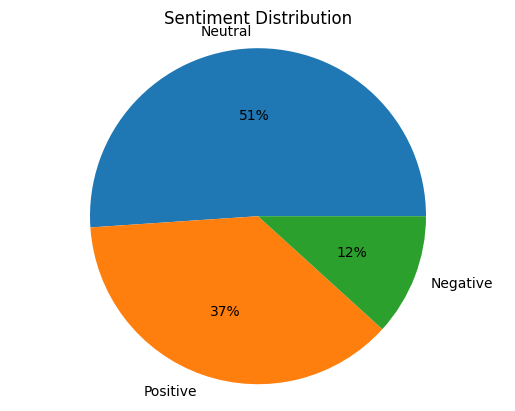

In [151]:
# Pie Chart:

labels = sentiment_percent.index

sizes = sentiment_percent.values

# Plot:

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.0f%%')

ax.set_title('Sentiment Distribution')

ax.axis('equal')

plt.show()

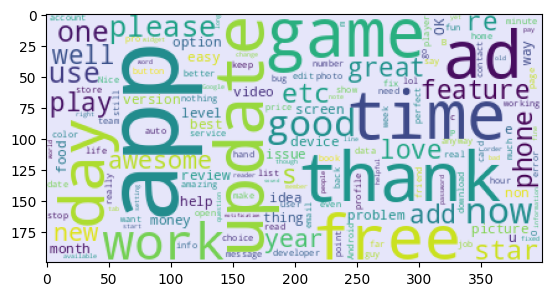

In [152]:
# Word Frequency Analysis:

from wordcloud import WordCloud

# Splitting the positive sentiment words, exploding and finding the unique values of them:

words = text_new_df[text_new_df['Sentiment'] == 'Positive']['Translated_Review'].str.split().explode().value_counts()

positive_words = words.index.tolist()

positive_words = " ".join(positive_words)

wordcloud = WordCloud(background_color='lavender').generate(positive_words)

plt.imshow(wordcloud)


###Sentiment Model Building:

In [153]:
# Defining X and y:

X = text_new_df['Translated_Review']

label = LabelEncoder()

y_encoded = label.fit_transform(text_new_df['Sentiment'])

# Split data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# TF-IDF:

vectorizer = TfidfVectorizer()

X_train_tf = vectorizer.fit_transform(X_train)

X_test_tf = vectorizer.transform(X_test)

# Train XGBoost model:

xg_model = xgb.XGBClassifier(eval_metric='logloss')

xg_model.fit(X_train_tf, y_train)

# Accuracy:

y_pred = xg_model.predict(X_test_tf)

print(accuracy_score(y_test, y_pred))


0.9461039282706692


In [154]:
# Make predictions on new data:

new_review = input("Enter new app review: ")

new_review_vect = vectorizer.transform([new_review])

predicted_review = xg_model.predict(new_review_vect)

output_review = label.inverse_transform(predicted_review)[0]

print(f"Predicted App Review: {output_review}")

#print(xg_model.predict(new_review_vect))

Enter new app review: This app is lovely
Predicted App Review: Positive


##LSTM Model:

In [155]:
from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

# Tokenization:

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)

X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding:

maxlen = 100

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)

X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)


In [156]:
from keras.models import Sequential

from keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical


#y_encoded = to_categorical(y)

#X_train, X_test, y_train_lstm, y_test_lstm = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

model = Sequential()

model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))

model.add(LSTM(128, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128))

model.add(Dense(3, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          500000    
                                                                 
 lstm_4 (LSTM)               (None, 100, 128)          117248    
                                                                 
 dropout_2 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 749219 (2.86 MB)
Trainable params: 749219 (2.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming text_new_df['Sentiment'] contains your labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(text_new_df['Sentiment'])
y_encoded = to_categorical(integer_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

maxlen = 100
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=maxlen)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=maxlen))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))  # Change for multi-class classification

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/10
1472/1472 [==============================] - 53s 33ms/step - loss: 0.9665 - accuracy: 0.5101 - val_loss: 0.9605 - val_accuracy: 0.5114
Epoch 2/10
1472/1472 [==============================] - 26s 18ms/step - loss: 0.7519 - accuracy: 0.7056 - val_loss: 0.7374 - val_accuracy: 0.7164
Epoch 3/10
1472/1472 [==============================] - 26s 17ms/step - loss: 0.7266 - accuracy: 0.7229 - val_loss: 0.7351 - val_accuracy: 0.7169
Epoch 4/10
1472/1472 [==============================] - 22s 15ms/step - loss: 0.7235 - accuracy: 0.7240 - val_loss: 0.7209 - val_accuracy: 0.7293
Epoch 5/10
1472/1472 [==============================] - 21s 14ms/step - loss: 0.7185 - accuracy: 0.7273 - val_loss: 0.7201 - val_accuracy: 0.7279
Epoch 6/10
1472/1472 [==============================] - 23s 15ms/step - loss: 0.6805 - accuracy: 0.7525 - val_loss: 0.6570 - val_accuracy: 0.7656
Epoch 7/10
1472/1472 [==============================] - 21s 14ms/step - loss: 0.6451 - accuracy: 0.7707 - val_loss: 0.6524 -

In [158]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

print(accuracy_score(y_test, y_pred))

631/631 [==============================] - 4s 5ms/step
0.0


In [159]:
# Make predictions on new data using LSTM model:

# Function to prepare the new review text
def prepare_new_review(new_review):
    seq = tokenizer.texts_to_sequences([new_review])
    padded = pad_sequences(seq, maxlen=100, padding='post')
    return padded

# Get input from the user
new_review = input("Enter new app review: ")

# Prepare the review
new_review_prepared = prepare_new_review(new_review)

# Make the prediction
predicted_review_probabilities = model.predict(new_review_prepared)
predicted_review_index = np.argmax(predicted_review_probabilities, axis=1)
output_review = label_encoder.inverse_transform(predicted_review_index)[0]

print(f"Predicted App Review Sentiment: {output_review}")

Enter new app review: This app is lovely 
1/1 [==============================] - 0s 24ms/step
Predicted App Review Sentiment: Neutral


### Topic Modeling:

In [160]:
nltk.download('stopwords')

nltk.download('wordnet')

# Preprocessing of text:

def preprocess(text):

    text = re.sub("(\\d|\\W)+", " ", text)

    text = text.lower()

    text = text.split()

    # Lemmatization:

    lm = WordNetLemmatizer()

    stop_words = set(stopwords.words("english"))

    text = [lm.lemmatize(word) for word in text if word not in stop_words]

    return ' '.join(text)

text_new_df['Processed_Review'] = text_new_df['Translated_Review'].apply(lambda x: preprocess(x))

# Vectorization:

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

dtm = vectorizer.fit_transform(text_new_df['Processed_Review'])

# Applying LDA:

lda = LatentDirichletAllocation(n_components=10, random_state=42)

lda.fit(dtm)

# Displaying topics
def display_topics(model, feature_names, no_top_words):

    for topic_idx, topic in enumerate(model.components_):

        print("Topic %d:" % (topic_idx))

        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 0:
card like credit make money great time message account cool
Topic 1:
love app great easy really people like work time day
Topic 2:
great easy app hotel order flight food price customer need
Topic 3:
great game awesome love make like hate best pay free
Topic 4:
time app work account log great like news tried try
Topic 5:
update phone work time version new screen fix need problem
Topic 6:
nice like money color picture really app make pay love
Topic 7:
game ad fun play love like time level really playing
Topic 8:
good game great play fix time thing problem app star
Topic 9:
like game best far love time think want really amazing


###Observation:

Financial gain and convenience: Topic 0 suggests interest in financial apps and credit cards for earning money easily.

Positive social experiences: Topic 1 highlights apps that are easy to use and foster positive social interaction.

Travel and booking: Topic 2 shows focus on travel and booking apps, emphasizing practicality and affordability.

Gaming: Topics 3, 7, 8, and 9 all relate to gaming. Users express strong emotions (love/hate) towards games, particularly free-to-play options, and emphasize aspects like fun, engagement, and problem-solving.

Work and time management: Topic 4 indicates use of work-related apps and interest in time management tools.

Technical issues: Topic 5 reveals concerns about phone updates and technical problems users face.

Aesthetics and financial rewards: Topic 6 suggests users value attractive interfaces and opportunities for financial gain within apps.

Overall, the reviews reflect a diverse range of interests and needs amongst users. They primarily value convenience, positive social experiences, affordability, engaging gameplay, and potentially earning money through apps.